<a href="https://colab.research.google.com/github/paulxdillon/Chem-Eng/blob/master/VapourPressure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

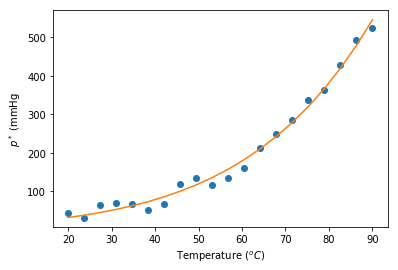

[10.761741336064732, 4228.541161678313, 436.9053788742264]

In [20]:
import numpy
from scipy.optimize import curve_fit
import pylab

n=20
A = 8.07
B = 1730
C = 233

x = numpy.linspace(20,90,num=n)
error = numpy.random.rand(n)
y = numpy.zeros(n)
for i in range(n):
  y[i] = A-B/(x[i]+C)
  y[i] = (10**y[i] + 50*error[i]-0.1)
  
def antoine(temp,a,b,c):
  n = temp.size
  p = numpy.zeros(n)
  for i in range(n):
    p[i] = 10**(a-b/(temp[i]+c))
  return p

params = [10,2000,200]
popt,pcov = curve_fit(antoine,x,y,p0=params)

yfit = antoine(x,popt[0],popt[1],popt[2])
pylab.plot(x,y,'o',x,yfit)
pylab.xlabel('Temperature ($^oC$)')
pylab.ylabel('$p^*$ (mmHg')
pylab.show()
[popt[0], popt[1], popt[2]]
